## Análise de Dados - Cursos plataforma de ensino *online*

A análise de dados é uma ferramenta essencial para impulsionar os negócios de uma empresa, e consequentemente, agregar valor.
<br>
<br>
Um dos profissionais necessários para a geração de valor para empresas, é o cientista/analista de dados. Este profissional é capaz de retirar insights de diversas fontes de dados.
<br>
<br>
Dito tudo isso, você, como cientista/analista de dados recebeu a missão de analisar dados de uma empresa ensino online de tecnologia. Seu principal objetivo, é através dos dados (disponibilizados na <a href="https://drive.google.com/file/d/1PE-9PTK5twBuUOuuKAk3Oo02Is8Dr8q-/view?usp=share_link">pasta compartilhada</a> deste módulo), é o de responder algumas perguntas de negócios para auxiliar a empresa a aprimorar os seus serviços e produtos.
<br>
<br>
Detalhes da base de dados podem ser vistos na plataforma Kaggle pelo <a href="https://www.kaggle.com/datasets/thedevastator/udemy-courses-revenue-generation-and-course-anal">link</a>
<br>
<br>
Para isso, use os conhecimentos obtidos neste módulo (e anteriores) para responder as seguintes questões:

**Dicas:**

- Serão três diferentes bases de dados disponibilizadas na pasta do módulo, separadas por assunto (curso). Porém, todas elas contêm o mesmo cabeçalho. Logo, para que consiga responder as perguntas abaixo, unifique-as em um único **DataFrame** do pandas, e realize as análises.
- Não é necessário criar gráficos/visualizações para apresentar os resultados de cada pergunta. Porém, se você estiver confortável para criá-los quando necessário, fique à vontade.

### Perguntas a serem respondidas a partir dos dados.

1. Quantos cursos estão disponíveis na plataforma?

In [97]:
import pandas as pd
import numpy as np

In [59]:

df_business = pd.read_csv("3.1-data-sheet-udemy-courses-business-courses.csv")
df_design = pd.read_csv("3.1-data-sheet-udemy-courses-design-courses.csv")
df_music = pd.read_csv("3.1-data-sheet-udemy-courses-music-courses.csv")
df_web = pd.read_csv("3.1-data-sheet-udemy-courses-web-development.csv")

general_df = pd.concat([df_business, df_design, df_music, df_web], ignore_index = True)
general_df.to_csv("geral.csv")

general_df = pd.read_csv("geral.csv")
print(pd.unique(general_df["course_title"]).shape[0], "cursos.")

3664 cursos.


2. Quais e quantos são os cursos que abordam o assunto: JavaScript?

In [58]:
general_df["course_title"] = general_df["course_title"].str.lower()
js = general_df.loc[(general_df["course_title"].str.contains('javascript', na=False))]
print("Quantidade:", js.shape[0], "cursos\n#########" "\nCursos:")
js[["course_title"]]

Quantidade: 137 cursos
#########
Cursos:


,course_title
2482,learn javascript & jquery from scratch
2484,javascript: understanding the weird parts
2499,learning dynamic website design - php mysql an...
2500,javascript essentials
2512,the complete javascript course for web develop...
...,...
3602,let's javascript! code a calculator
3612,advance javascript for coders: learn oop in ja...
3615,17 complete javascript projects explained step...
3632,popular javascript framework:learn the languag...


3. Qual é o preço médio (coluna *price*) dos cursos oferecidos na plataforma?

In [31]:
print("O preço médio dos cursos é $", round(general_df["price"].mean(),2))

O preço médio dos cursos é $ 66.12


4. Quais são os cinco cursos com maior número de inscritos (coluna *num_subscribers*)?

In [36]:
top5 = general_df.sort_values(by = "num_subscribers", ascending = False).head()
top5[["course_title","num_subscribers"]]

,course_title,num_subscribers
2476,Learn HTML5 Programming From Scratch,268923.0
2477,Coding for Entrepreneurs Basic,161029.0
2478,The Web Developer Bootcamp,121584.0
2479,Build Your First Website in 1 Week with HTML5 ...,120291.0
2480,The Complete Web Developer Course 2.0,114512.0


<AxesSubplot: xlabel='course_title'>

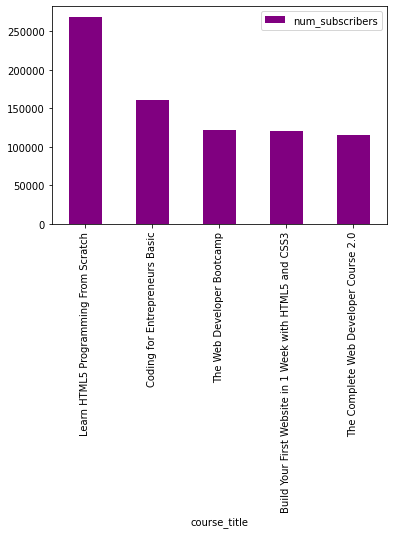

In [98]:
top5.plot.bar(x="course_title",y="num_subscribers", color='purple')

5. Dos cinco cursos mais populares em termos de inscritos, mostre o **rate médio**, **máximo** e **mínimo** de cada um deles.

In [30]:
top5["Rating"].describe()

count    5.000000
mean     0.746000
std      0.131263
min      0.550000
25%      0.690000
50%      0.780000
75%      0.820000
max      0.890000
Name: Rating, dtype: float64

6. Apresente os dez cursos mais visualizados na plataforma.

In [68]:
top10 = general_df.sort_values(by = "num_reviews", ascending = False).head(10)
top10[["course_title","num_reviews"]]

,course_title,num_reviews
2478,The Web Developer Bootcamp,27445.0
2480,The Complete Web Developer Course 2.0,22412.0
2485,Angular 4 (formerly Angular 2) - The Complete ...,19649.0
2484,JavaScript: Understanding the Weird Parts,16976.0
2497,Modern React with Redux,15117.0
2492,Learn and Understand AngularJS,11580.0
2493,Learn and Understand NodeJS,11123.0
2476,Learn HTML5 Programming From Scratch,8629.0
2504,Angular 2 with TypeScript for Beginners: The P...,8341.0
1797,Pianoforall - Incredible New Way To Learn Pian...,7676.0


<AxesSubplot: xlabel='course_title'>

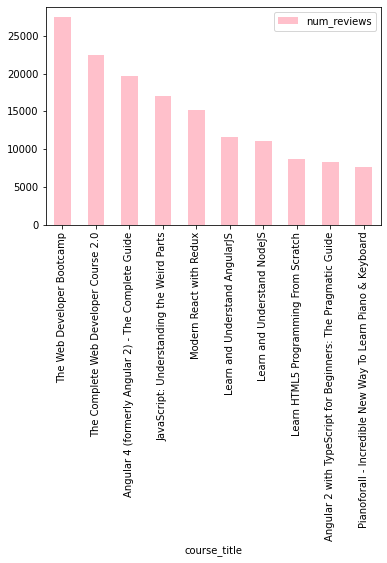

In [87]:
top10.plot.bar(x="course_title",y="num_reviews", color='pink')

7. A partir dos dez cursos mais vistos, mostre: 1) qual tem o maior número de inscritos; 2) qual tem o maior **rate** (avaliação do curso).

In [42]:
top_subs = top10.sort_values(by = "num_subscribers", ascending = False).head(1)
top_subs[["course_title","num_subscribers"]]

,course_title,num_subscribers
2476,Learn HTML5 Programming From Scratch,268923.0


In [43]:
top_rate = top10.sort_values(by = "Rating", ascending = False).head(1)
top_rate[["course_title","Rating"]]

,course_title,Rating
1797,Pianoforall - Incredible New Way To Learn Pian...,0.96


8. Dos cursos listados na base de dados, qual tem maior duração em horas?

In [44]:
top_hours = general_df.sort_values(by = "content_duration", ascending = False).head(1)
top_hours[["course_title","content_duration"]]

,course_title,content_duration
1358,The Complete Figure Drawing Course HD,78.5


9. Dos cursos listados na base de dados, qual tem o maior número de aulas (*lectures*)?

In [45]:
top_lecture = general_df.sort_values(by = "num_lectures", ascending = False).head(1)
top_lecture[["course_title","num_lectures"]]

,course_title,num_lectures
2556,Back to School Web Development and Programming...,779.0


,num_lectures,course_title
0,779.0,Back to School Web Development and Programming...


10. Apresente o número (contagem) de cursos agrupados por nível (coluna *level*).

In [48]:
general_df.groupby(["level"]).size()

level
All Levels            1925
Beginner Level        1271
Expert Level            58
Intermediate Level     422
dtype: int64

11. Quais são os cursos mais recentes contidos na base de dados?

In [51]:
recents = general_df.sort_values(by = "published_timestamp", ascending = False).head(10)
recents[["course_title","published_timestamp"]]

,course_title,published_timestamp
1183,Cryptocurrency (BTC & ETH) Investment & Tradin...,2017-07-06T21:46:30Z
1164,Forex how traders beat the markest with little...,2017-07-06T21:16:13Z
1027,Condor Broken Wing Butterfly Options Trading C...,2017-07-06T19:47:16Z
2465,ABRSM Grade III Piano Class - Handel Sonatina ...,2017-07-06T16:12:34Z
3677,Angular 4 Front To Back,2017-07-06T15:04:55Z
1504,Photoshop isn't like what you imagine A to Z .,2017-07-06T03:32:48Z
1166,Practical Film Financing: Finding & Pitching I...,2017-07-05T21:46:55Z
1142,Bitcoin & Ethereum Course (2 Course Bundle),2017-07-05T19:06:26Z
2475,4 Week Rhythm Mastery,2017-07-05T16:07:44Z
1156,Options Trading Foundation: Your journey to co...,2017-07-05T04:41:54Z


12. Apresente o número (contagem) de cursos agrupados por nível (coluna *level*) e por assunto (coluna *subject*).

In [54]:
general_df.groupby(["level","subject"])["course_id"].count()

level               subject                 
All Levels          Business Finance            633
                    Graphic Design              335
                    Musical Instruments         324
                    Subject: Web Development    633
Beginner Level      Business Finance            399
                    Graphic Design              184
                    Musical Instruments         266
                    Subject: Web Development    422
Expert Level        Business Finance             25
                    Graphic Design                7
                    Musical Instruments          12
                    Subject: Web Development     14
Intermediate Level  Business Finance            134
                    Graphic Design               76
                    Musical Instruments          78
                    Subject: Web Development    134
Name: course_id, dtype: int64

13. Disponibilize suas análises em um repositório do Github e compartilhe o link abaixo.

In [ ]:
https://github.com/rebecca-medeiros/analise_cursosead

14. Crie uma conta no <a href="https://www.kaggle.com/datasets/thedevastator/udemy-courses-revenue-generation-and-course-anal">Kaggle</a> e crie um Notebook com as análises feitas neste projeto. A ideia aqui, é que você comece a criar um portfólio de análise de dados na plataforma :)

In [ ]:
https://www.kaggle.com/code/rebeccademedeiros/analise-de-dados-udemy